<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_5_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Concepts of probability theory we will need

In this lecture we are in the realm of probability theory.
Let me remind you its key concepts.

The atoms of every probability theory problem are elementary outcomes.
But the key concept is one of an event -- it's a complex outcome that can include multiple elementary outcomes.
Formally it's a subset of the set of the elementary outcomes.
We assign probabilities to events.
Two events may happen at once. 
For example if we draw dice we can have an even number and a number divisible by $4$ simultaniously.

We can ask what is the probability of event $A$ to happen if we know that event $B$ has happened.
In a way we pretend that event $B$ has happened but we didn't notice wheither $A$ has also happened and want to guess.
The probability of $A$ given $B$ is called the conditional probability $P(A \mid B)$.
Events can also be joined together (they are sets after all) and we can quire for a probability of the joint event $P(A\cap B)$ or $P(A, B)$. 
![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_5_naive_bayes/py8sf_eqwwftzs-ssfdab3hsupe.png)

If

$$
P(A\cap B)=P(A)P(B)
$$

events $A$ and $B$ are called independent.
Informally independent events refer to unrelated aspects of the phenomenon we are observing.
Don't confuse conditional probability with joint probability. 
Conditional and joint probabilities are connected by formula

$$
P(A|B)=\frac{P(A\cap B)}{P(B)}
$$

Another key concept is random variable. Sometimes it's possible to assign a number to each elementary outcome.
We then may think that the result of the trial is the number. 
We can also use analytical function (probability distribution) to assign probability to get a specific number in a trial.
The most popular distributions are Uniform, Binomial, Negative Binomial, Geometric, Gaussian, Poisson.



#Bayes' theorem

At first Bayes' theorem seems like a simple statement about conditional probabilities

$$P(A|B)=\frac{P(B|A) P(A)}{P(B)}$$ 

where
$A$ and $B$ are events and $P(B)\neq 0$.
* $P(A|B)$ is a conditional probability: the likelihood of event $A$ given that $B$ is true.
* $P(B|A)$ is a conditional probability: the likelihood of event $B$ given that $A$ is true.
* $P(A)$ and $P(B)$ are the probabilities of observing $A$ and $B$ independently of each other; this is known as the marginal probability.

Let's prove it. 
By definition of conditional probability (likelihood)
$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$
and 
$$P(B|A)=\frac{P(A\cap B)}{P(A)}$$

Therefore substituting $P(A\cap B)$ (joint probability) from the second equation into the first we get Bayes' rule

$$P(A|B)=\frac{P(B|A) P(A)}{P(B)}$$

$\textbf{Q.E.D.}$


Bayes therorem proved to be very inflential as it gave rise to Bayesian interpretation of probability.
In this intepretation probability measures a “degree of belief.”  Bayes’ theorem then links the degree of belief in a proposition before and after accounting for evidence. For example, suppose it is believed with 50% certainty that a coin is twice as likely to land heads than tails. If the coin is flipped a number of times and the outcomes observed, that degree of belief may rise, fall or remain the same depending on the results.
Also Bayes' theorem has many practical applications. One of the is Naive Bayesian classification.

There are two jars (red and blue) with white and black balls in them. The red jar has 3 white and 5 black balls in it and blue has 1 white and 9 black balls. In a dark room you randomly choose a jar and pick a ball then go to another brightly lit room to find out that the ball is white. What is the probability that you got the ball from the red jar?

$\blacktriangleleft$
$$P(\text{red jar}\mid\text{white ball})=\frac{P(\text{white ball }|\text{ red jar}) P(\text{red jar})}{P(\text{white ball})}=\frac{3/8 \times 1/2}{P(\text{white ball})}$$

$P(\text{white ball})$ needs some extra thinking.  You can draw white ball either from red or from blue jar. So

$$P(\text{white ball})=P(\text{white ball}\mid\text{red jar}) P(\text{red jar})+P(\text{white ball}\mid\text{blue jar}) P(\text{blue jar})$$

$$P(\text{white ball})=3/8 \times 1/2+1/10 \times 1/2 =19/80$$

Substitute back to get

$$P(\text{red jar}\mid\text{white ball})=\frac{3/8 \times 1/2}{19/80}=15/19.$$

$\blacktriangleleft$

As we can see it's almost for sure that we have chosen the red jar. That's an expected result as the blue jar containes only 1 white ball and it seems unlikely that we have chosen it.
This problem suggests to rewrite denominator in Bayes' rule in an extended form that takes into account all pathways the event $B$ might happen. As a fact we use the Law of total probability

$$P(B)=P(B\mid A)P(A)+P(B\mid \neg A)P(\neg A)$$

Extended form of Bayes' rule reads

$$P(A|B)=\frac{P(B|A) P(A)}{P(B\mid A)P(A)+P(B\mid \neg A)P(\neg A)}.$$

In our problem
* $A$ - choosing the white ball;
* $B$ - choosing the red jar;
* $\neg B$ - choosing the blue jar.

Also note that a priori -- before we left the dark room we know that two jars had equal probability $1/2$ to have been chosen (as they were chosen by random). But after we obtained new evidence - realized that we piсked a white ball, a posteriori probabilities changed. Probability that we chose red jar is now $15/19$. 

$$\text{New data}\Longrightarrow \text{Probability reevaluation}$$

It is believed the more data(evidence) we get the more accurate our final(posterior) probabilities become. 
Therefore initial (prior) probabilities could be very crude. In fact they could be just rough guesses or frequences of an event occuring in a small number of experiments. We can also adopt a simple and convinient theoretical distribution as our prior: Gaussian or uniform.


Note there is specific terminology connected with Bayes' rule: prior, posterior, likelihood, evidence. Informally Bayes' rule can be rewritten as:

$$
\text{posterior}=\frac{\text{prior}\times \text{likelihood}}{\text{evidence}}
$$

where
* $\text{posterior(probability)} = P(A \mid B)$
* $\text{prior(probability)} =P(A)$
* $\text{likelihood} =P(A|B)$
* $\text{evidence} =P(B)$

Actually Bayesian theorem became kind of a nerd icon. For example, take a look at this Bayesian t-shirt

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_5_naive_bayes/tt.png)





#Bayes theorem example: Monty Hall problem

The Monty Hall problem is a brain teaser, in the form of a probability puzzle, loosely based on the American television game show Let's Make a Deal and named after its original host, Monty Hall. 

*Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?*

Here is how it is featured in a 2008 movie "21" (directed by Robert Luketic).

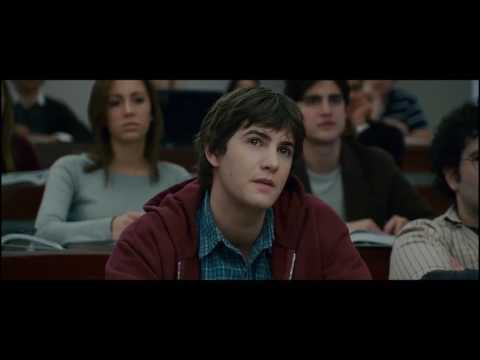

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('EWdcOID8zxU', width=600, height=400, start=286, end=379)

Let's solve this puzzle with Bayes.
We have three types of events coming into play:
* $Ci$ - car is behind door $i$;
* $Pi$ - players chooses door $i$;
* $Hi$ - host opens the door $i$.

Before any choises are made we know that unconditional probability $P(Ci)=1/3$.
Suppose the player initially chooses the door $1$ ($P1$ event) and the host opened the door $3$ ($H3$ event).

What is the probabilty $P(C2 | P1, H3)$? We use the Bayes theorem to get


$$
P(C2 | P1, H3) = \frac{P(P1, H3|C2)P(C2)}{P(P1, H3)} =\frac{P(H3|P1, C2) P(P1)P(C2)}{P(H3|P1)P(P1)}=\frac{P(H3|P1, C2)P(C2)}{P(H3|P1)}=\frac{1\times1/3}{1/2}=2/3,
$$

where we have used the fact that $P(H3|P1, C2)=1$ as the host knows where the car is and deliberately opens the door with the goat behind it.
We have also used definition of conditional probability a couple of times.
Probability of the event that the car is behind door $2$ is now $2/3$ instead of $1/3$ that's why the best strategy is to switch your initial choise.

#Classification problem

Consider problem of classification: we have a "thing" that we should label with "tags". In other words we want to identify which of several categories an object belongs.
* Say we have a letter and the set of tags is $\{\text{spam},\neg \text{spam}=\text{ham}\}$. This is the example of binary classification.
* In an automotive app we want to determine wheither an object is a car, a pedestrian or a sign. This is multiclass classification.
* We want to attribute person to a country he was born. 
* We want attribute a person to a profession 

In the terminology of machine learning, classification is considered an instance of supervised learning, i.e., learning where a training set of correctly identified observations is available. The corresponding unsupervised procedure is known as clustering, and involves grouping data into categories based on some measure of inherent similarity or distance.
An algorithm that implements classification, especially in a concrete implementation, is known as a classifier. 

#Naive Bayes

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

In reality we have not one but a few random variables that characterize the thing we want to classify. Usually they are called features $f_1, f_2, \dots f_i, \dots f_N$. In Naive Bayes we assume that this features are independent. 

$$P(f_1, f_2, \dots f_i, \dots f_N |C_k) = P(f_1 | C_k) P(f_2 | C_k) \dots P(f_i | C_k) \dots P(f_N |C_k)$$.

Suppose we want to use Bayes theorem to calculate the probability that our thing belongs to class $C_k$ given $f_1 = x_1, f_2=x_2, \dots f_i=x_i, \dots f_N=x_N$

$$P(x_1, x_2, \dots x_i, \dots x_N |C_k) = \frac{P(x_1 | C_k) P(x_2 | C_k) \dots P(x_i | C_k) \dots P(x_N |C_k) P(C_k)}{P(x_1, x_2, \dots x_i, \dots x_N)}$$.


The denominator is just a scaling facor that doesn't depend on $C_k$. Let me it denote with Z.

$$P(C_k  | x_1, x_2, \dots x_i, \dots x_N) = \frac{\prod_{i=1}^{N}P(x_i | C_k)P(C_k)}{Z}$$.
In other words
$$P(C_k  | x_1, x_2, \dots x_i, \dots x_N) \propto P(C_k)\prod_{i=1}^{N}P(x_i | C_k)$$.

Once we have probabilities that an object belongs to $C_k$ for any $k$ we need to decide what class do we actually assign our object to. What we were dealing up to now was Naive Bayes probability model. Now we need to choose the so called decision rule. 

$$
\text{Naive Bayes classifier} = \text{Naive Bayes probability model} + \text{decision rule}
$$

One common rule is to pick the hypothesis that is most probable; this is known as the maximum a posteriori or MAP decision rule. The corresponding classifier, a Bayes classifier, is the function that assigns a class label as follows:
$$
C = \text{argmax}_{k=1,..,K}P(C_k)\prod_{i=1}^{N}P(x_i | C_k)
$$


In real world we do not know $P(x_i | C_k)$  -- we can make assumptions. 
We could guess what kind of distribution that could be (e.g. Gaussian) but the parameters of that
distribution ares still unknown. 

Depending on the $P(x | C_k)$ we adopt there are 3 main types of Naive Bayes classifiers:
* Gaussian
* Multinomial
* Bernoulli

Once we've made our mind on $P(x | C_k)$ that's where the training comes into play: we use the training set to estimate the parameters of that distribution and to determine $P(C_k)$.





In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Gaussian Naive Bayes

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.
Suppose we have continous variable $x$ and classes $\{C_1, C_2, \dots, C_K\}$.
In Gaussian Naive Bayes we presume that

$$P(f=x| C_k) = \frac{1}{\sqrt{2 \pi \sigma_{k}^2}}e^{-\frac{(x-\mu_k)^2}{2\sigma_{k}^2}}$$.

Each class $C_k$ has its own average $\mu_k$ and standard deviation $\sigma_k$.




##1D  Example of Gaussian Naive Bayes

Suppose we want to classify points on the line. That is $N=1$, hence we have only one feature.

The tags we want to assign are colors $\{red, blue\}$. In fact we want to perform binary classification ($K=2$).

We generate two arrays of points that are have normal distributions.

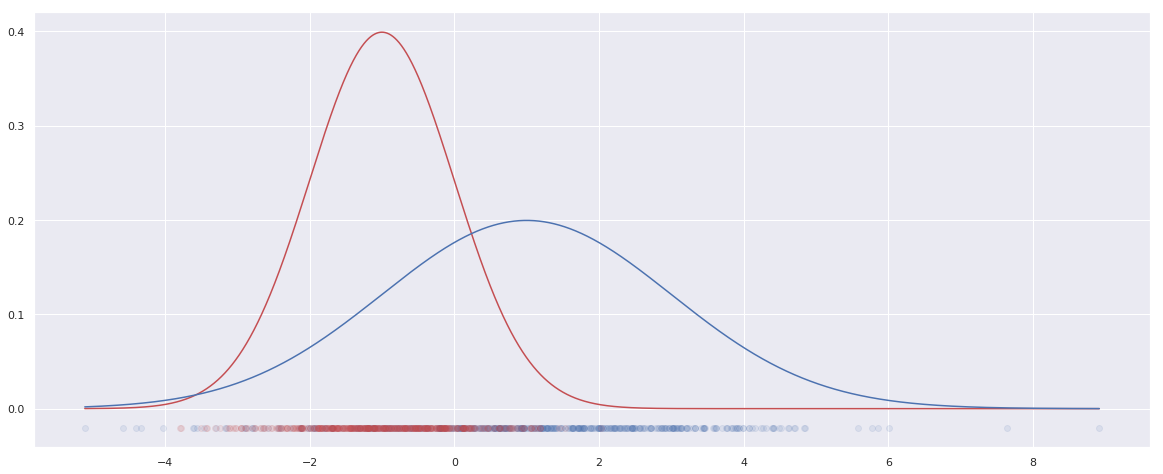

In [148]:
import numpy as np
import matplotlib.pyplot as pp
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB

np.random.seed(1);
N_red = 500;
N_blue = 500;
red_mean = -1;
blue_mean = 1;
red_std = 1;
blue_std = 2.0;

arr_red=np.random.normal(loc=red_mean, scale=red_std, size=N_red)
arr_blue=np.random.normal(loc=blue_mean, scale=blue_std, size=N_blue)
tags_red=np.full(N_red,0)
tags_blue=np.full(N_blue,1)
training_set = np.hstack((arr_red, arr_blue))
x_min = min(training_set)
x_max = max(training_set)

labels_set = np.hstack((tags_red, tags_blue))
training_set = np.expand_dims(training_set, axis=1)

model = GaussianNB()
model.fit(training_set, labels_set);

fig = pp.figure(figsize=(20,8))
pp.plot(arr_blue, np.zeros_like(arr_blue)-0.02, 'o', color='b', alpha=0.1)
pp.plot(arr_red, np.zeros_like(arr_red)-0.02, 'o', color='r', alpha=0.1)

x_axis = np.arange(x_min, x_max, 0.001)
pp.plot(x_axis, norm.pdf(x_axis, red_mean, red_std), color='r')
pp.plot(x_axis, norm.pdf(x_axis, blue_mean, blue_std), color='b')
pp.show()




We generate new array of equidistant points and apply naive Bayes classifier. First let's plot probability of the points to belong to one of two classes.

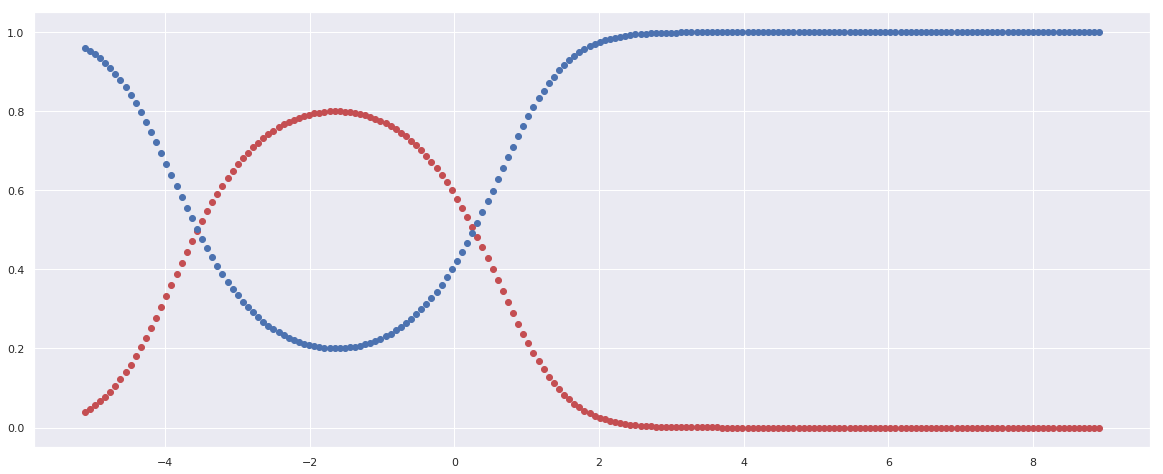

In [153]:
X = np.linspace(x_min, x_max, num=200)
X = np.expand_dims(X, axis=1)
y_predicted_P = model.predict_proba(X)
y_predicted = model.predict(X)
fig = pp.figure(figsize=(20,8))
pp.plot(X,y_predicted_P[:,0], 'o', color='r')
pp.plot(X,y_predicted_P[:,1], 'o', color='b')
pp.show()

Now we employ decision rule and from two colors choose the one with the higher probability.

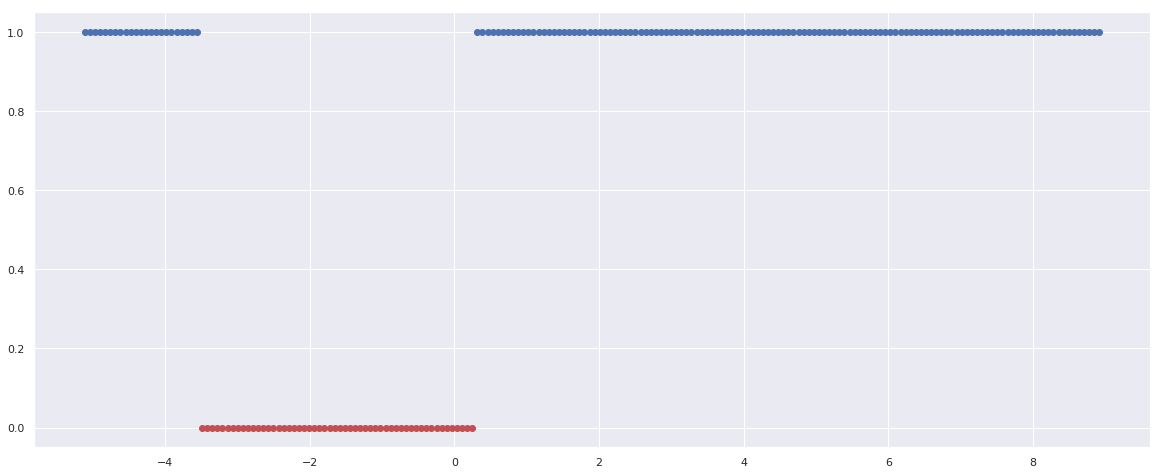

In [154]:
blue_points = np.ma.masked_where(y_predicted < 0.5, y_predicted)
red_points = np.ma.masked_where(y_predicted > 0.5, y_predicted)
fig = pp.figure(figsize=(20,8))
pp.plot(X, red_points, 'o',color='r')
pp.plot(X, blue_points, 'o',color='b')
pp.show()

Here is the final result imposed on our training sample and probability distribution. Note, that it's affected by the number of red and blue points we got in the training set.

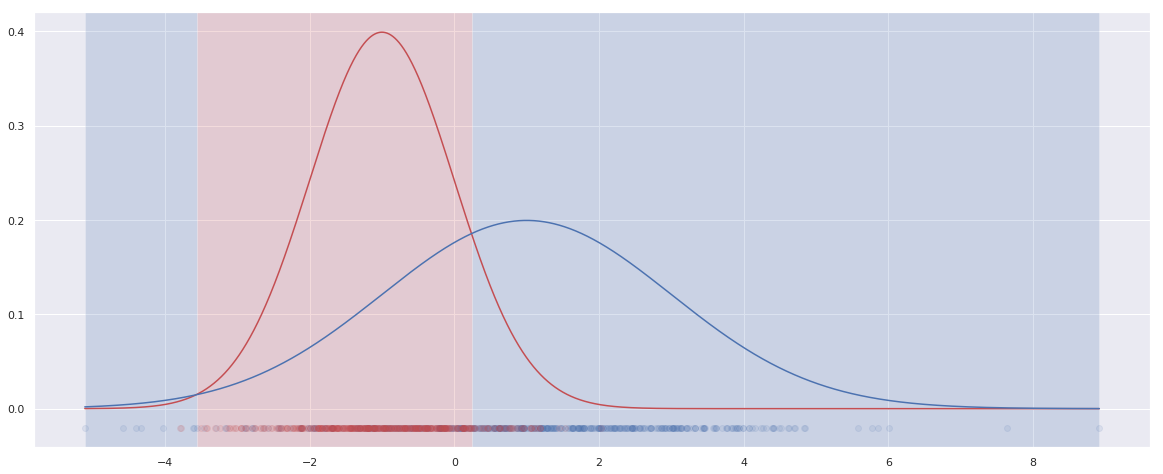

In [155]:
idx = np.nonzero(y_predicted[:-1] != y_predicted[1:])[0]
fig = pp.figure(figsize=(20,8))
pp.plot(arr_blue, np.zeros_like(arr_blue)-0.02, 'o', color='b', alpha=0.1)
pp.plot(arr_red, np.zeros_like(arr_red)-0.02, 'o', color='r', alpha=0.1)

x_axis = np.arange(x_min, x_max, 0.001)
pp.plot(x_axis, norm.pdf(x_axis, red_mean, red_std), color='r')
pp.plot(x_axis, norm.pdf(x_axis, blue_mean, blue_std), color='b')
pp.axvspan(x_min, X[idx[0]], facecolor='b', alpha=0.2)
pp.axvspan(X[idx[0]], X[idx[1]], facecolor='r', alpha=0.2)
pp.axvspan(X[idx[1]], x_max, facecolor='b', alpha=0.2)
pp.show()

##2D  Example of Gaussian Naive Bayes

Suppose we want to classify points on the $2D$ plane. That is $N=1$, hence we have only one feature.

The tags we want to assign are $\{red, blue\}$ again. As before we perform binary classification ($K=2$).

The probabilities $P(x | red)$ and $P(x | blue)$ are both Gaussians with std's equal to 1.5.

We generate $100$ points in our training set.

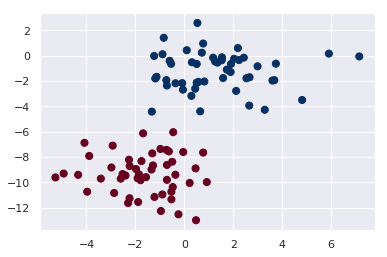

In [130]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');



Choose Gaussian model for naive Bayes to fit the training set.

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Generate $2000$ points we want to assign tags to. The models assigns numbers $\{0=red,1=blue\}$ for the points.

In [0]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

array([1, 1, 1, ..., 0, 1, 1])

Here is the result. We see a slightly curved boundary in the classifications—in general, the boundary in
Gaussian naive Bayes is quadratic.

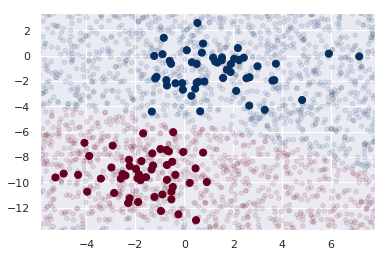

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We can also get posterior probabilities $[P(x|red),P(x|blue)]$.

In [0]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

#Multinomial Naive Bayes

##Example: Multinomial Naive Bayes


Have you heard about the Multinomial distribution before? This is the generalization on the Binomial distribution.
Suppose you pick $n=6$ balls from a big bag with red, blue and green balls ($N=3$).  You are given that the probability to dray red is $p_{\text{red}}=0.2$, blue — $p_{\text{blue}}=0.5$ and green — $p_{\text{green}}=0.3$. What is the probability to draw $3$ red, $2$ blue balls and $1$ green ball? You do not care about order of the appearance of the balls. The answer is given by the Multinomial distribution

$$P(\boldsymbol{x}=[3,2,1])=\frac{6!}{3! \times 2! \times 1!}0.2^{3}\times0.5^{2} \times0.1^{1}.$$

 Why is it called multinomial? It's related to the multinomial theorem that is the generalization of the binomial theorem:

 $$(p_1+p_2+\dots+p_N)^n=\sum_{i_1+i_2+\dots+i_N=n}\frac{n!}{i_1!i_2!\dots i_N!}\prod_{j=1}^N{p_{j}^{i_j}}.$$
 
 For example
 
 $$(0.2+0.5+0.3)^6=0.2^6\times0.5^0\times0.3^0 +\dots+\frac{6!}{3! \times 2! \times 1!}0.2^{3}\times0.5^{2} \times0.1^{1}+\dots+0.2^0\times0.5^0\times0.3^6. $$
 
Now you have the idea why in Multinomial Naive Bayes we choose

$$P(\boldsymbol{x}|C_k)=\frac{(\sum_i x_i)!}{\prod_i x_i!}\prod p_{ki}^{x_i},$$

where $\boldsymbol{x}$ is a vector of integers.


One place where Multinomial Naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. In fact we are pretending that a document is a placeholder where we place words drawn from the bag  (bag-of-words model). 
Here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.
Let’s download the data and take a look at the target names:

In [0]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [0]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF–IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

Here we used ```TfidfVectorizer``` that transforms document into matrix that assigns to each word a few numbers including so called tf-idf.
Tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
Suppose we have a document $d$, word $t$ and a collection of documents $D$. Then

$$tfidf(t,d,D)=tf(t,d)\times idf(t,D)$$ where

* $tf(t,d)$ is term frequency that describes how common is the term in the document. The simpliest choice is to choose tems frequency. You can also choose boolean "frequencies": $tf(t,d) = 1$ if $t$ occurs in $d$ and $0$ otherwise.
* $idf(t,D)$ is the inverse document frequency equal to $\log{\frac{|D|}{|\{d \in D\}|}}$. The inverse document frequency is a measure of how much information the word provides, i.e., if it's common or rare across all documents. Its purpose is to filter out common words: words like "this" and "is" don't provide much information.



In [0]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

We can now use so called confusion matrix to visuialize the result. 
Confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. We will see how it works.


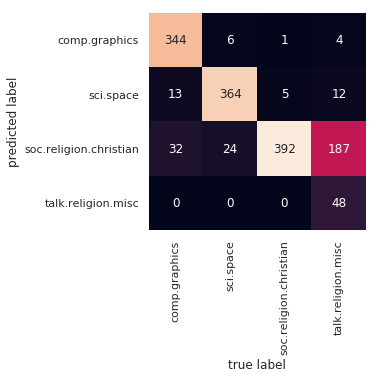

In [0]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

The very cool thing here is that we now have the tools to determine the category for any string, using the predict() method of this pipeline. Here’s a quick utility function that will return the prediction for a single string:


In [0]:
def predict_category(s, train=train, model=model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

In [0]:
predict_category('sending a payload to the ISS')

'sci.space'

In [0]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [0]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking. Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

#Bernoulli Naive Bayes

In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs.

$$P(\boldsymbol{x}|C_k)=\prod_{i=1}^{N}p_{ki}^{x_i}(1-p_{ki}^{x_i})^{x_i}$$

For example when analyzing a document we can take into account not the number of occurences of a given word in a document but rather it's presence or absence (boolean frequency). 

##Example: Bernoulli Naive Bayes

In [0]:
ones_and_zeros = '''
1011010111101001010101010101001010101001010100101011100100101010101010101010101010101010101010101010101010101010101010101001101101101001010101001010101011010101010101010101010101010101010101100001010101010101010001001110100101
'''


import numpy as np

class Predictor():
  def __init__(self, Nmax, D):
    self.history = [0 for _ in range(D-1)]
    self.stats = np.ones(Nmax**D).reshape([Nmax]*D)
    self.D = D
    
  def best_guess(self):
    cond_stats = self.stats[tuple(self.history)] if self.D > 1 else self.stats
    guess = np.argmax(cond_stats)
    certainty = cond_stats[guess] / cond_stats.sum()
    return guess, certainty
  
  def update(self, num):
    if self.D <= 1:
      self.stats[num] += 1
    else:
      self.stats[tuple(self.history)][num] += 1
      self.history = self.history[1:] + [num]

    
class BayesGuesser:
  def __init__(self, Nmax):
    self.predictors = [Predictor(Nmax, D) for D in [1,2,3,4,5]]
    
  def best_guess(self):
    data = np.array([p.best_guess() for p in self.predictors]).T
    return int(data[0, np.argmax(data[1])])
    
    return self.predictors[np.argmax(self.guesses)].best_guess()
  
  def update(self, num):
    for p in self.predictors:
      p.update(num)
      
      
ones_and_zeros = ''.join(ones_and_zeros.split())
data = [int(i) for i in ones_and_zeros]

bg = BayesGuesser(2)
for e in data:
  bg.update(e)


In [0]:
test = '''
0010101010101001001
'''

test = ''.join(test.split())
data = [int(i) for i in test]

stat_correct = 0
stat_missed = 0

for e in data:
  if bg.best_guess() == e:
    stat_correct += 1
  else:
    stat_missed += 1
  bg.update(e)
  
print("stats: correct = ", stat_correct, ", misses = ", stat_missed, ",  ", stat_correct / (stat_correct + stat_missed) * 100, "%")


stats: correct =  16 , misses =  3 ,   84.21052631578947 %


In [0]:
bg.guesses

array([ 82, 212, 210, 205, 202])

In [0]:
bg.misses

array([165,  35,  37,  42,  45])

In [0]:
import IPython
from google.colab import output

_const_guess = '''
<br> My guess is: %s <br>
<button onclick=\"google.colab.kernel.invokeFunction(\'notebook.Guessed\', [%s], {})\"> Correct </button>
<button onclick=\"google.colab.kernel.invokeFunction(\'notebook.Missed\', [%s], {})\"> No </button>
'''

stat_correct = 0
stat_missed = 0

def guessed_click(number):
  global stat_correct
  stat_correct += 1
  bg.update(int(number))
  do_guess()

def missed_click(number):
  global stat_missed
  stat_missed += 1
  bg.update(1 - int(number))
  do_guess()
  
def do_guess():
  number = bg.best_guess()
  output.clear()
  display(IPython.display.HTML(_const_guess % (str(number), str(number), str(number))))
  output.register_callback('notebook.Guessed', guessed_click)
  output.register_callback('notebook.Missed', missed_click)
  print("stats: correct = ", stat_correct, ", misses = ", stat_missed)
  
do_guess()

stats: correct =  9 , misses =  24


#Applications of Naive Bayes

What are pros of Naive Bayes?
*  It is are extremely fast for both training and prediction
*  It provides straightforward probabilistic prediction
*  It is often very easily interpretable
*  It has very few (if any) tunable parameters

Where should we use Naive Bayes Classification?
*  When the naive assumptions actually match the data (very rare in practice)
*  For very well-separated categories, when model complexity is less important
*  For very high-dimensional data, when model complexity is less important

Industrial applications:
* news classification
* faces/objects recognition
* spam detection (filthy spammers aware of Bayes spam filtering are trying to fool algorithm by so called Bayesian poisoning - addition of random (or even carefully selected) words that are unlikely to appear in a spam message and  cause the spam filter to believe the message to be legitimate.)
* medical diagnosis
* weather prediction

